# <center> Carbon Cars Emissions</center>

## Table Of Contents:

* [Prerequisites](#zero-bullet)
  * [Install the Libraries (if needed)](#zero-bullet_1)
  * [Import the Libraries](#zero-bullet_2)
* [Import the Data Set](#first-bullet)
* [Exploratory Data Analysis](#second-bullet)
  * [How the Data is written?](#second-bullet_1)
  * [Plots of the Features and Relationships](#second-bullet_2)
  * [More Explorative Data Analysis](#second-bullet_3)
* [Build and Train the Model](#third-bullet)
  * [Modeling](#third-bullet_1)
  * [Evaluate the Model](#third-bullet_2)

## Prerequisites <a class="anchor" id="zero-bullet"></a>

### Install the Libraries (if needed) <a class="anchor" id="zero-bullet_1"></a>

### Import Libraries <a class="anchor" id="zero-bullet_2"></a>

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Import the Data Set From My Github Repository  <a class="anchor" id="first-bullet"></a>

In [21]:
!wget -O FuelConsumption.csv https://raw.githubusercontent.com/zackariadaoudi/Machine-Learning-Projects/main/Data/MY2024_Fuel_Consumption.csv

--2024-02-21 19:15:19--  https://raw.githubusercontent.com/zackariadaoudi/Machine-Learning-Projects/main/Data/MY2024_Fuel_Consumption.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61860 (60K) [text/plain]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  60.41K  --.-KB/s    in 0.007s  

2024-02-21 19:15:19 (8.07 MB/s) - ‘FuelConsumption.csv’ saved [61860/61860]



### About the Data

I have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for 2024 light-duty vehicles for retail sale in Canada. The Data is available here: [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/edba4afa-dc19-480c-bbe4-57992fc9d0d6).
The Data is stocked in a repository in my GitHub account, you can access the full Data to download it manually here [My GitHub](https://github.com/zackariadaoudi/zackdaoudi/tree/main/assets/Data).

## Exploratory Data Analysis <a class="anchor" id="second-bullet"></a>

### How The Data is written? <a class="anchor" id="second-bullet_1"></a>

First we will read the .csv file using the Panda library, then we will visualize it using the function **head()**.

In [22]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,Model_year,Make,Model,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel_type,City,Highway,Combined_L,Combined_mpg,CO2_emissions,CO2_rating,Smog_rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


We can see that the Data is described following these
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0
- **Smog Rating** e.g. 5

We can use the function **describe()** to summarize the data, for example we can extract the minimum and the maximum for each feature, e.g. the minimum for the CO2 emission is 104 g/km while the maximum is 608 g/km.

In [23]:
# summarize the data
df.describe()

,Model_year,Engine_size,Cylinders,City,Highway,Combined_L,Combined_mpg,CO2_emissions,CO2_rating,Smog_rating
count,733.0,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,2024.0,3.078854,5.525239,12.362892,9.414598,11.036698,27.452933,258.339700,4.496589,5.469304
std,0.0,1.272063,1.883486,3.407772,2.335388,2.869070,7.801992,65.366562,1.315752,1.613027
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.000000,7.600000,9.000000,22.000000,209.000000,4.000000,5.000000
50%,2024.0,2.900000,6.000000,12.200000,9.200000,10.900000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.800000,12.700000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


Next, we use some statistics and compute the Cumulative Distribution Function **CDF**.

In [24]:
cdf = df[["Vehicle_class",'Engine_size', 'Cylinders','Combined_L','CO2_emissions','CO2_rating','Smog_rating']]
cdf.head(8)

,Vehicle_class,Engine_size,Cylinders,Combined_L,CO2_emissions,CO2_rating,Smog_rating
0,Full-size,1.5,4,7.4,172,6,7
1,Full-size,1.5,4,7.8,181,6,6
2,Full-size,2.0,4,9.9,230,5,6
3,Sport utility vehicle: Small,3.5,6,11.2,263,4,5
4,Sport utility vehicle: Standard,3.0,6,12.4,291,4,5
5,Sport utility vehicle: Small,2.0,4,9.9,232,5,6
6,Sport utility vehicle: Small,2.0,4,10.3,241,5,6
7,Mid-size,2.0,4,8.7,205,5,5


### Plots of the Features and Relationships <a class="anchor" id="second-bullet_2"></a>

Now, we plot few of these features:

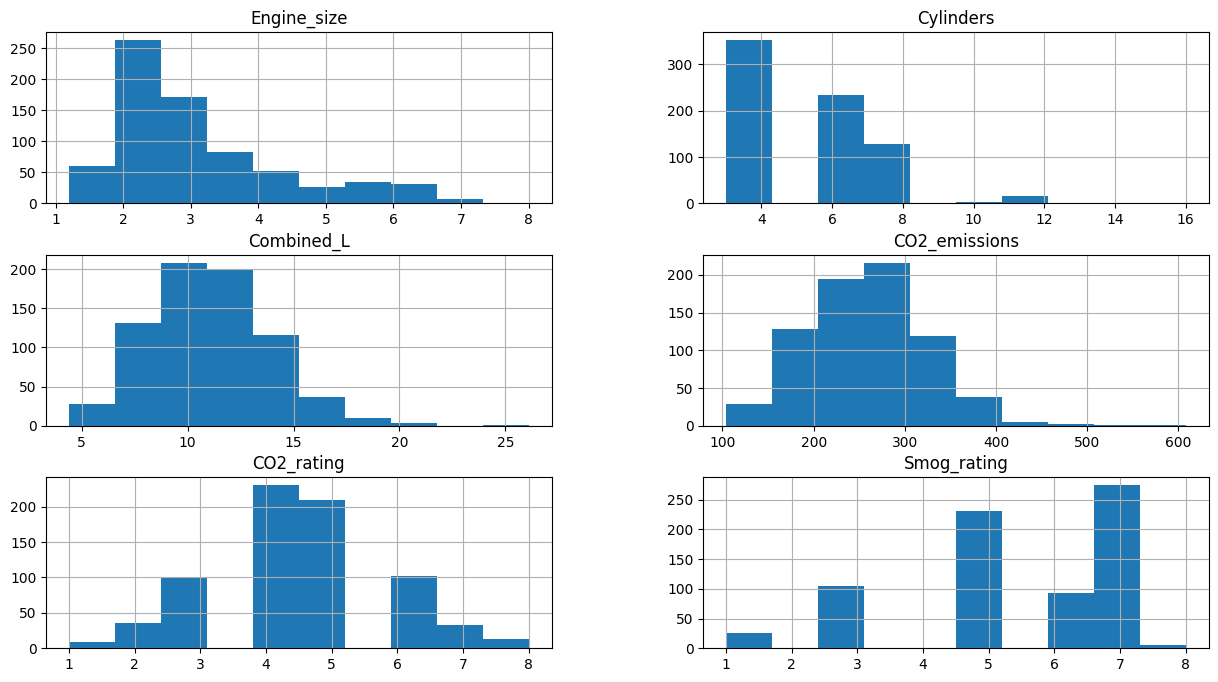

In [25]:
viz = cdf[['Engine_size', 'Cylinders','Combined_L','CO2_emissions','CO2_rating','Smog_rating']]
viz.hist()
plt.rcParams["figure.figsize"] = (11,11)
plt.show()

Then, we plot few of these features against the Emission, to see how linear their relationship is.
- Figure 1: **Engine Size** against **Carbon Emissions (g/km)** in <span style='color:Red'> red.  </span>
- Figure 2: **Cylinders** against **Carbon Emissions (g/km)** in <span style='color:Green'> green.  </span>
- Figure 3: **Fuel Consommation (L/100Km)** against **Carbon Emissions (g/km)** in <span style='color:Blue'> blue.  </span>
- Figure 4: **Smog Rating** against **Carbon Emissions (g/km)** in <span style='color:Purple'> purple.  </span>

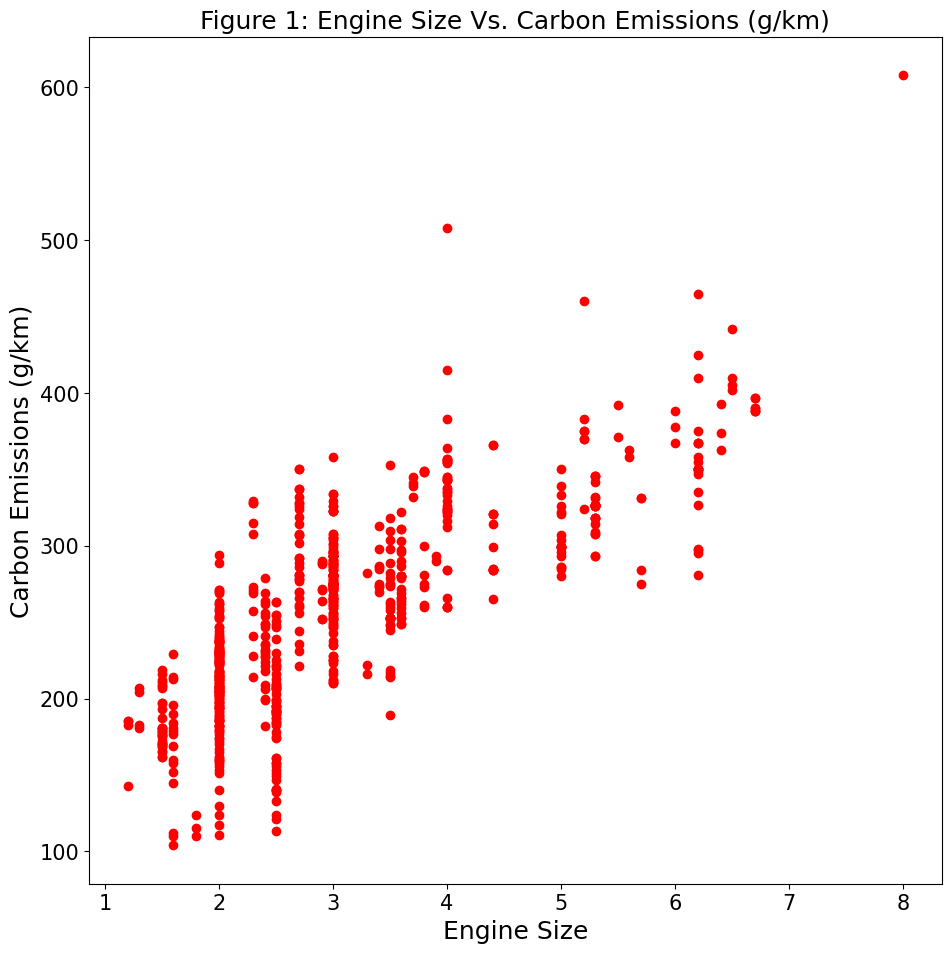

In [26]:
plt.scatter(cdf.Engine_size, cdf.CO2_emissions,  color='red')
plt.xlabel("Engine Size", fontsize = 18)
plt.ylabel("Carbon Emissions (g/km)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.rcParams["figure.figsize"] = (9,9)
plt.title('Figure 1: Engine Size Vs. Carbon Emissions (g/km)',fontsize = 18)
plt.show()

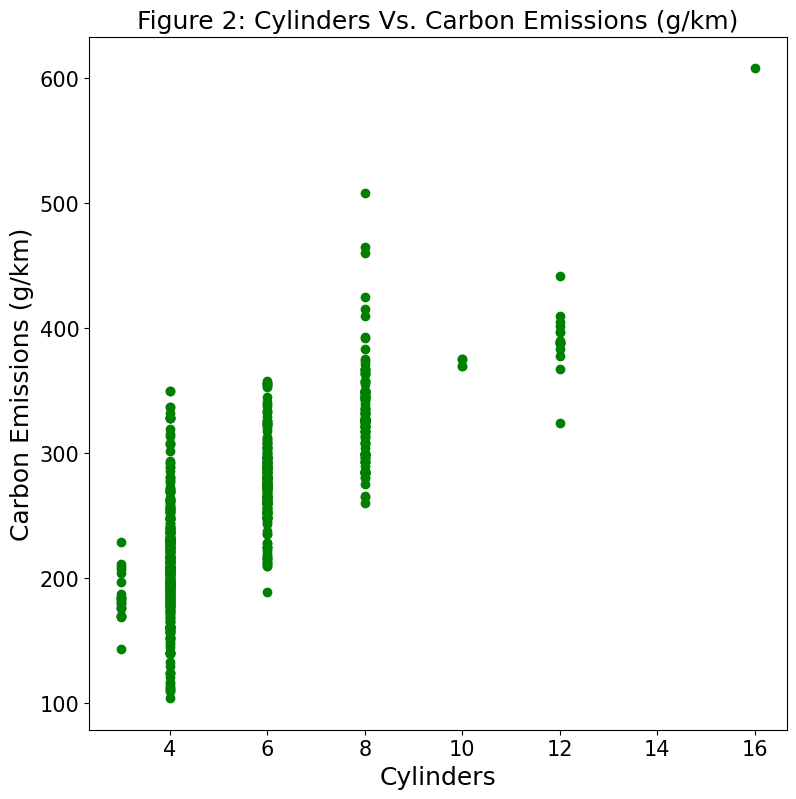

In [9]:
plt.scatter(cdf.Cylinders, cdf.CO2_emissions,  color='green')
plt.xlabel("Cylinders",fontsize = 18)
plt.ylabel("Carbon Emissions (g/km)",fontsize = 18)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.rcParams["figure.figsize"] = (9,9)
plt.title('Figure 2: Cylinders Vs. Carbon Emissions (g/km)',fontsize = 18)
plt.show()

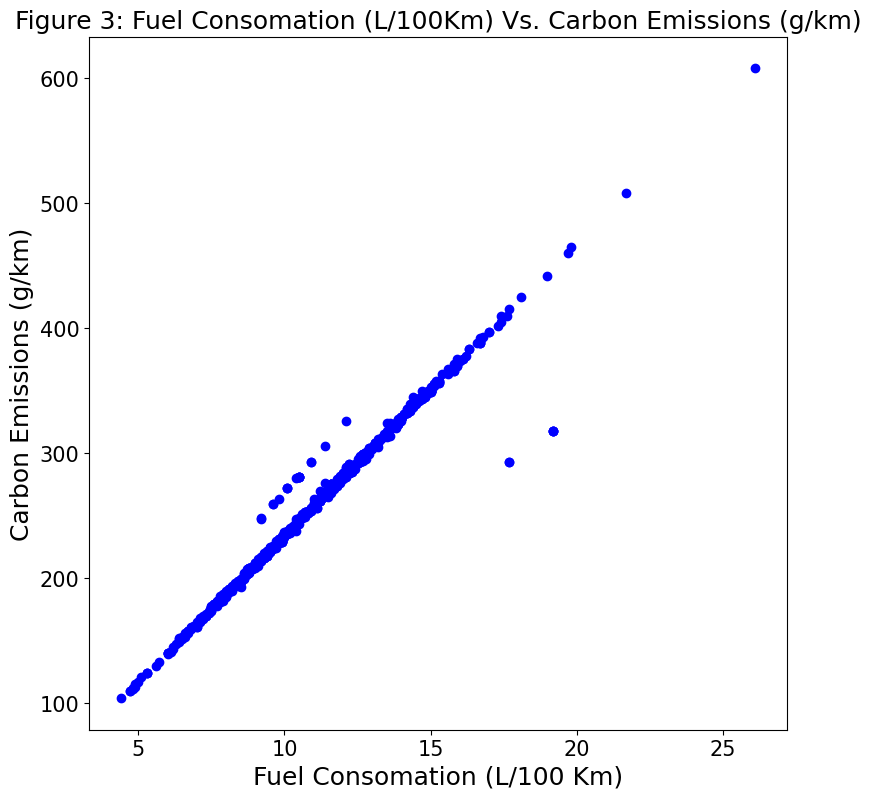

In [10]:
plt.scatter(cdf.Combined_L, cdf.CO2_emissions,  color='blue')
plt.xlabel("Fuel Consomation (L/100 Km)",fontsize = 18)
plt.ylabel("Carbon Emissions (g/km)",fontsize = 18)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.rcParams["figure.figsize"] = (9,9)
plt.title('Figure 3: Fuel Consomation (L/100Km) Vs. Carbon Emissions (g/km)',fontsize = 18)
plt.show()

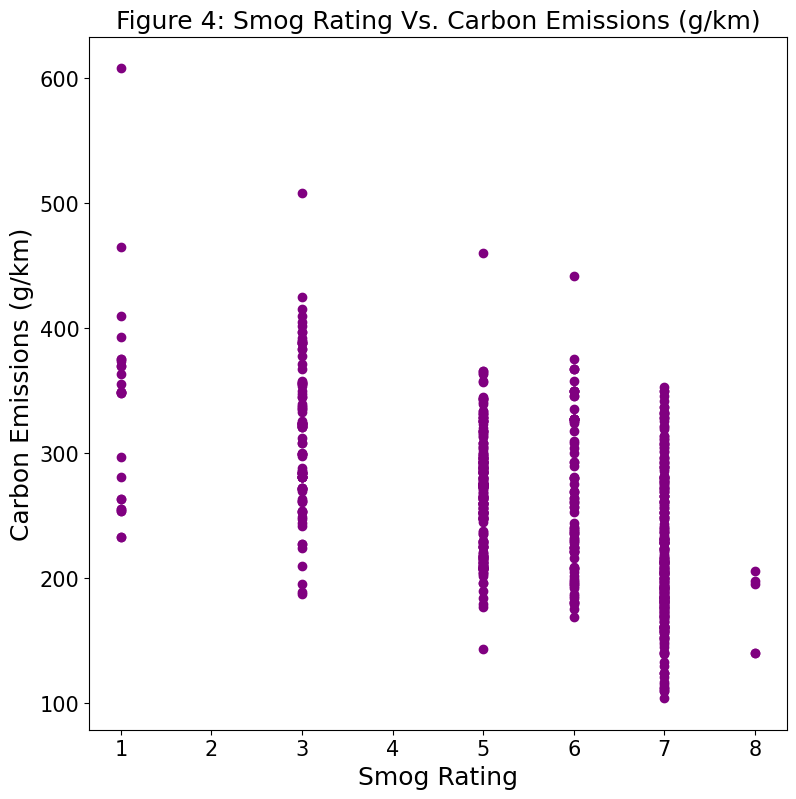

In [11]:
plt.scatter(cdf.Smog_rating, cdf.CO2_emissions,  color='purple')
plt.xlabel("Smog Rating",fontsize = 18)
plt.ylabel("Carbon Emissions (g/km)",fontsize = 18)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.rcParams["figure.figsize"] = (9,9)
plt.title('Figure 4: Smog Rating Vs. Carbon Emissions (g/km)',fontsize = 18)
plt.show()

### More Explorative Data Analysis <a class="anchor" id="second-bullet_3"></a>

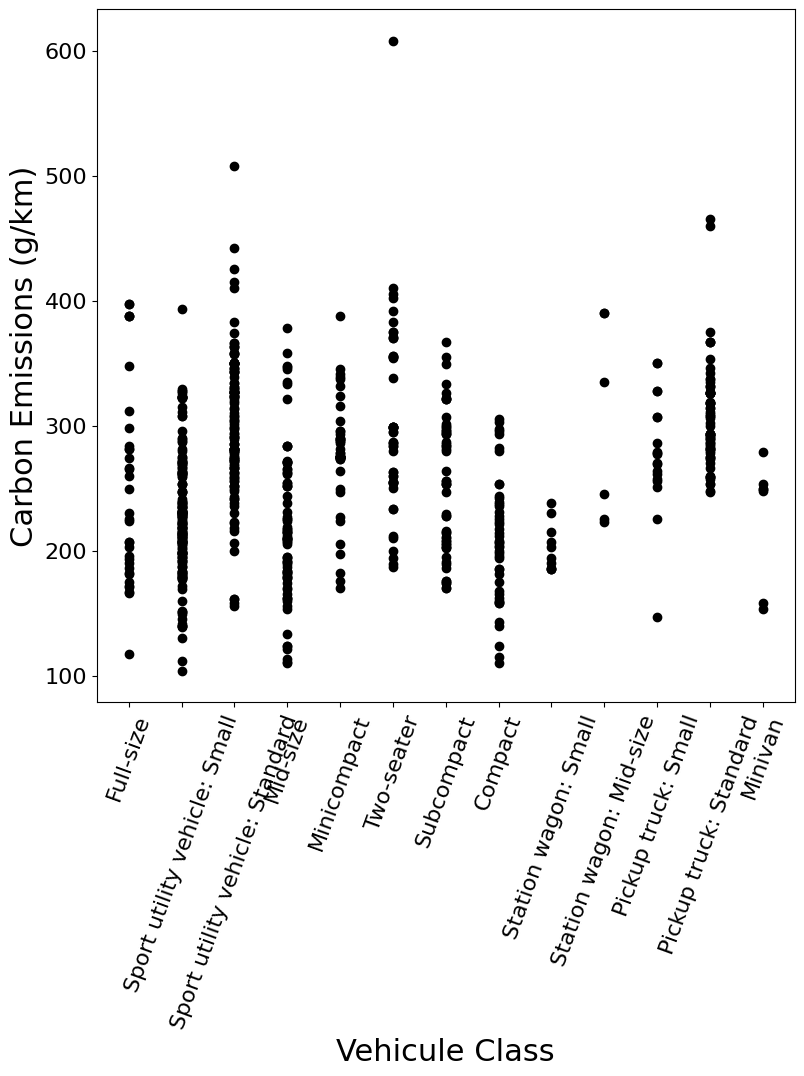

In [12]:
plt.scatter(df.Vehicle_class.to_numpy(), cdf.CO2_emissions.to_numpy(),  color='black')
plt.tick_params(axis='x', rotation=70)
plt.xlabel("Vehicule Class", fontsize = 22)
plt.ylabel("Carbon Emissions (g/km)", fontsize = 22)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

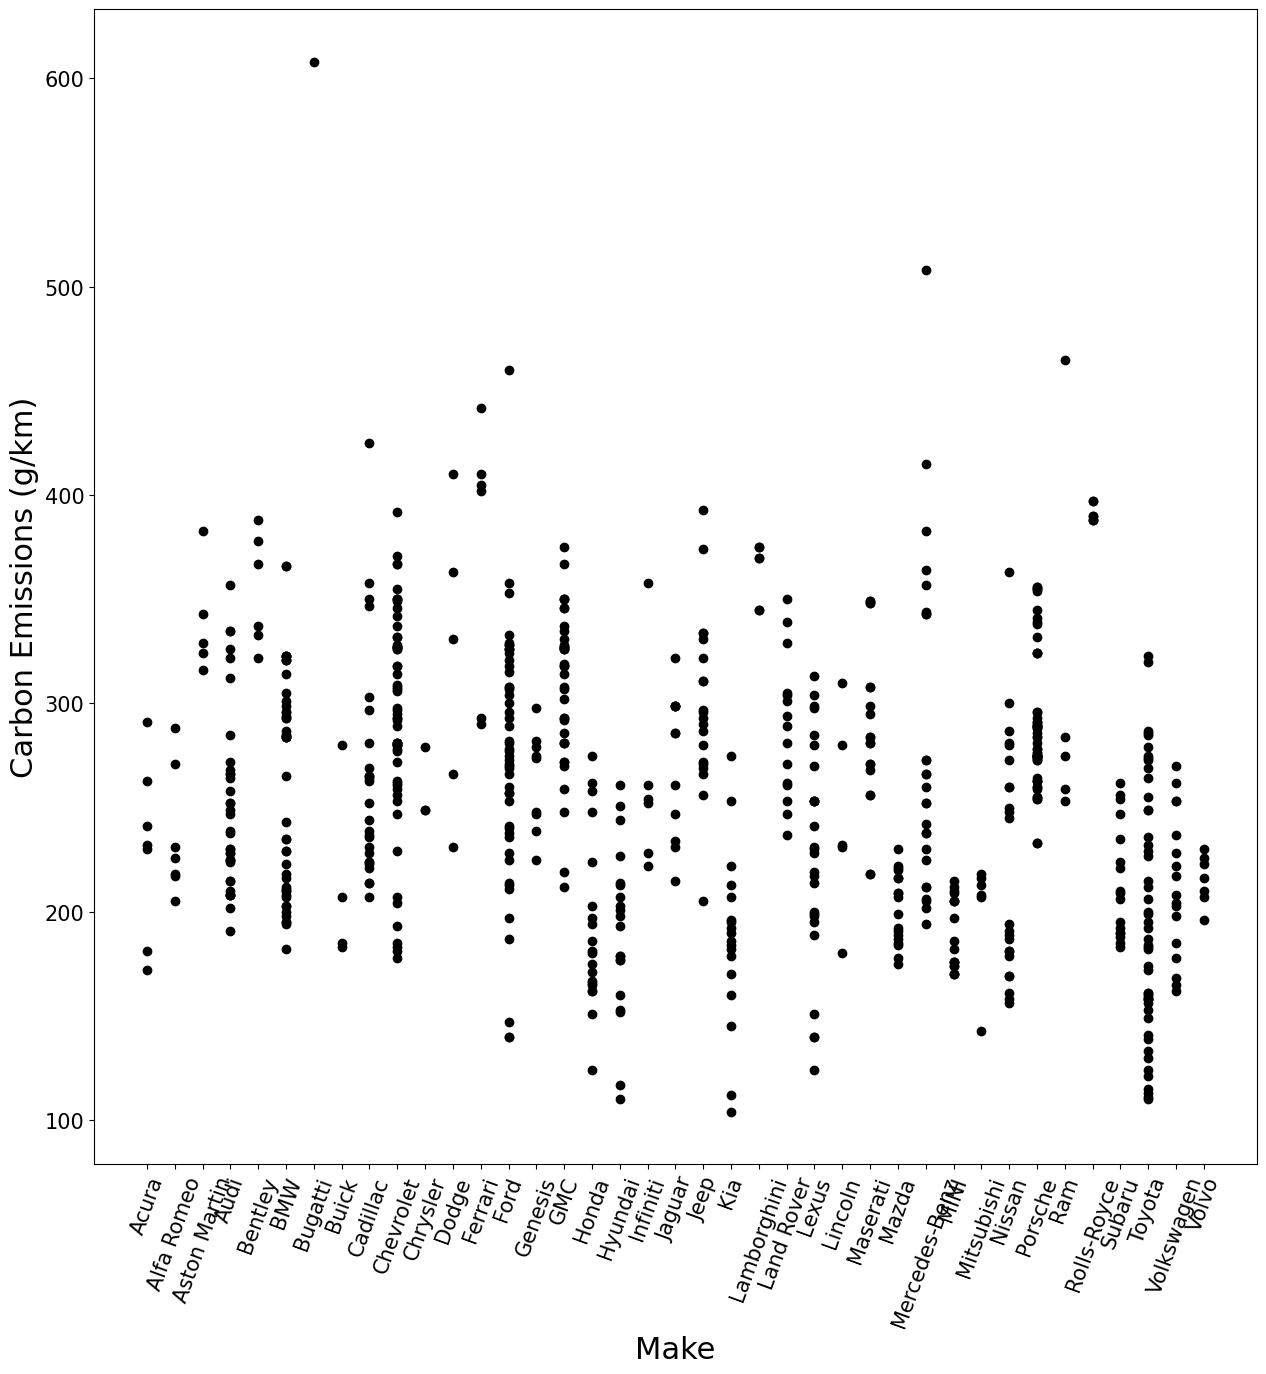

In [13]:
plt.scatter(df.Make.to_numpy(), cdf.CO2_emissions.to_numpy(),  color='black')
plt.tick_params(axis='x', rotation=70)
plt.xlabel("Make", fontsize = 22)
plt.ylabel("Carbon Emissions (g/km)", fontsize = 22)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Build and Train the Model <a class="anchor" id="third-bullet"></a>

The process of Train/Test Split refers to partitioning a data set into two folds: one for training purposes and the other for testing, ensuring that both sets are exclusive of each other. Training set is utilized to construct the model, whereas the testing set is employed to evaluate its performance. This approach significantly enhances the estimate of the model's performance on out-of-sample data — data that wasn't involved during the training phase. This accuracy reflects the model's capability to be generalized to new, unseen data.

By adopting this methodology, we ascertain that each datum in our testing set comes with a known outcome, providing an ideal scenario for robust testing procedures. The key here is that these specific data points' outcomes remain unknown to the model, as it hasn't been exposed to them during the training stage, guaranteeing a genuine out-of-sample assessment.

For the practical implementation of this split, we shall allocate 80% of our data to form the training set, leaving the residual 20% for testing. To randomly sample rows for these sets, we will utilize the **np.random.rand()** function from the NumPy library to generate a random selection mask.

In [14]:
msk = np.random.rand(len(df)) < 0.85
train = cdf[msk]
test = cdf[~msk]

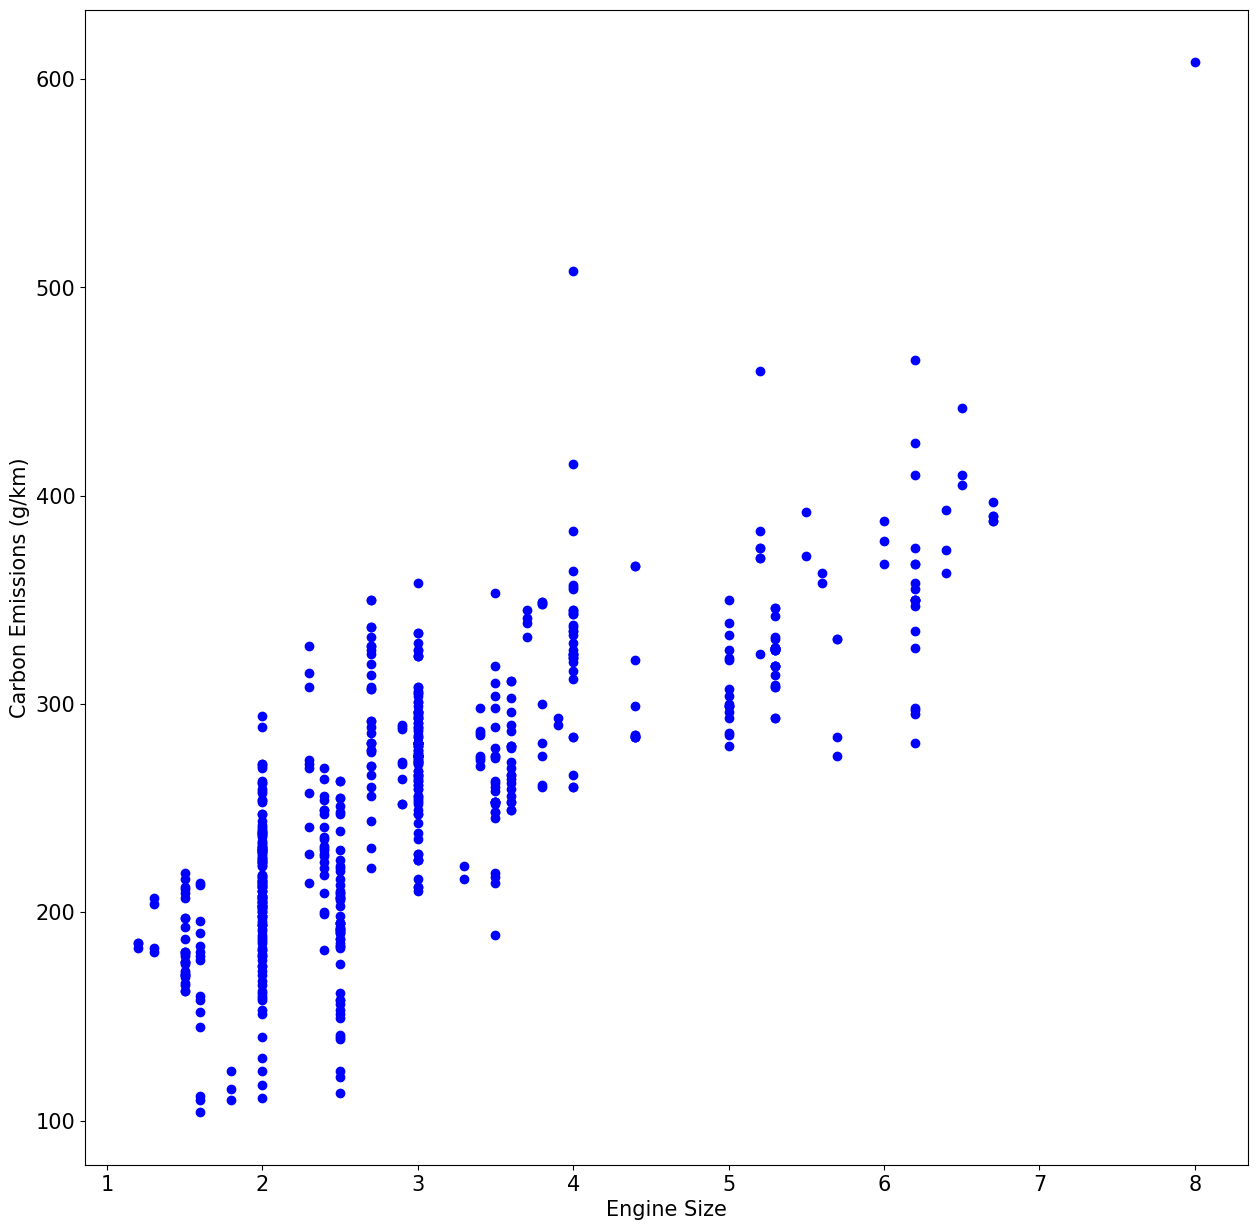

In [15]:
plt.scatter(train.Engine_size, train.CO2_emissions,  color='blue')
plt.xlabel("Engine Size", fontsize='15')
plt.ylabel("Carbon Emissions (g/km)", fontsize='15')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

### Modeling <a class="anchor" id="third-bullet_1"></a>

We use scikit-learn to model data.

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_size']])
train_y = np.asanyarray(train[['CO2_emissions']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[40.18658227]]
Intercept:  [135.13950799]


In simple linear regression, a 'coefficient' represents the slope of the best-fit line, while the 'intercept' corresponds to the point where the line crosses the vertical, or y-axis. These two values are the only parameters needed to define the line in a simple linear regression, which makes the model relatively straightforward as it depends on only one predictor variable and one response variable.

Utilizing the scikit-learn library (often imported as sklearn), we have powerful tools at our disposal to compute these parameters straight from our dataset. The library's algorithms can deduce the slope (coefficient) and y-axis intercept of our regression line by examining the relationship between our independent (predictor) and dependent (response) variables.

It is imperative that the entire dataset is accessible for the process. The algorithm must be able to iterate through all the data points in order to calculate the precise values of these parameters. With the complete dataset, sklearn can accurately determine how the predictor variable(s) affect the response variable and establish the best-fit line that minimizes the discrepancy between the predicted and actual values.

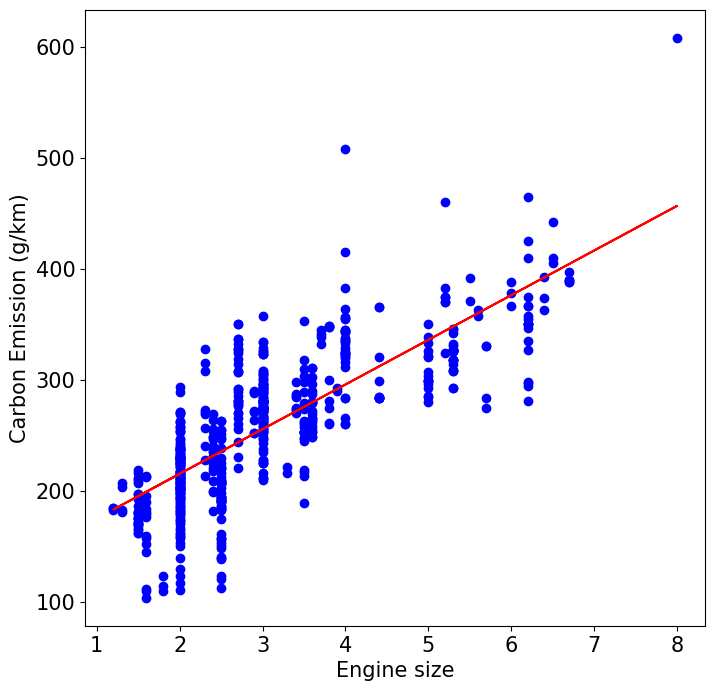

In [17]:
plt.scatter(train.Engine_size, train.CO2_emissions,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size", fontsize=15)
plt.ylabel("Carbon Emission (g/km)", fontsize=15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.rcParams["figure.figsize"] = (15,8)

### Evaluate the Model <a class="anchor" id="third-bullet_2"></a>

To assess the precision of a regression model, we juxtapose the predicted output values against the actual observed values. Using evaluation metrics is critical in model refinement, offering insights into how the model can be fine-tuned for enhanced performance.

   - Among the various model evaluation metrics obtainable, we will opt for the Mean Squared Error (MSE) to gauge the accuracy of our model relative to the test set:

   - Mean Absolute Error (MAE): This metric represents the average of the absolute differences between the predicted and actual values. It provides a straightforward measure of prediction accuracy as it quantifies the average magnitude of errors.

   - Mean Squared Error (MSE): MSE takes the average of the errors squared. This metric prioritizes larger errors over smaller ones, which can be advantageous when significant errors are particularly undesirable, as they contribute disproportionately to the total MSE.

   - Root Mean Squared Error (RMSE): This is the square root of the MSE. RMSE modifies the scale of the errors to be compatible with the original data and can be more interpretable for the same reason.

   - R-squared (R²): Although not an error metric, R-squared is a commonly used statistic to quantify the performance of a regression model. It measures the proportion of variance in the dependent variable that can be predicted from the independent variable(s). A model with an R-squared value close to 1.0 suggests a strong fit between the model and the observed data. Conversely, a negative R-squared value implies a model that does not perform well in capturing the data trends.

Each of these metrics provides different perspectives on model performance, and their relevance might vary depending on the specific context and objectives of the regression analysis.

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine_size']])
test_y = np.asanyarray(test[['CO2_emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 31.27
Residual sum of squares (MSE): 1555.83
R2-score: 0.61


In [44]:
predictions = regr.predict(test_x)
j = 0
for j in range(len(test_x)):
  print(f"For the engine size {test_x[j][0]}, the predicted CO2 emission is {round(predictions[j][0],1)}")
  j += 1


For the engine size 2.0, the predicted CO2 emission is 215.5
For the engine size 4.0, the predicted CO2 emission is 295.9
For the engine size 2.0, the predicted CO2 emission is 215.5
For the engine size 2.0, the predicted CO2 emission is 215.5
For the engine size 4.0, the predicted CO2 emission is 295.9
For the engine size 2.0, the predicted CO2 emission is 215.5
For the engine size 2.0, the predicted CO2 emission is 215.5
For the engine size 4.4, the predicted CO2 emission is 312.0
For the engine size 4.4, the predicted CO2 emission is 312.0
For the engine size 3.0, the predicted CO2 emission is 255.7
For the engine size 3.0, the predicted CO2 emission is 255.7
For the engine size 3.0, the predicted CO2 emission is 255.7
For the engine size 3.0, the predicted CO2 emission is 255.7
For the engine size 4.4, the predicted CO2 emission is 312.0
For the engine size 4.4, the predicted CO2 emission is 312.0
For the engine size 2.0, the predicted CO2 emission is 215.5
For the engine size 2.0,